# 20 - Estimadores Plug-and-Play

Até agora, vimos como corrigir os vieses em nossos dados no caso em que o tratamento não é atribuído aleatoriamente, resultando em um viés de confusão. Isso nos ajuda com o problema de identificação na inferência causal. Em outras palavras, uma vez que as unidades são intercambiáveis, ou seja, $Y(0), Y(1) \perp X$, torna-se possível aprender o efeito do tratamento. Mas estamos longe de concluir.
 
A identificação significa que podemos encontrar o efeito médio do tratamento. Em outras palavras, sabemos quão eficaz é um tratamento, em média. Claro, isso é útil, pois nos ajuda a decidir se devemos implementar um tratamento ou não. Mas queremos mais do que isso. Queremos saber se existem subgrupos de unidades que respondem melhor ou pior ao tratamento. Isso permitiria uma política muito melhor, na qual tratamos apenas aqueles que se beneficiarão.

## Configuração do Problema

Vamos relembrar nossa configuração de interesse. Dados os resultados potenciais, podemos definir o efeito individual do tratamento como a diferença entre os resultados potenciais.
 
$
\tau_i = Y_i(1) − Y_i(0),
$
 
Ou, no caso de tratamento contínuo, $\tau_i = \partial Y(t)$, onde $t$ é a variável de tratamento. Claro, nunca podemos observar o efeito individual do tratamento, porque só conseguimos ver um dos resultados potenciais.
 
$
Y^{obs}_i(t)= 
\begin{cases}
Y_i(1), & \text{if } t=1\\
Y_i(0), & \text{if } t=0
\end{cases}
$
 
Podemos definir o efeito médio do tratamento (ATE) como
 
$
\tau = E[Y_i(1) − Y_i(0)] = E[\tau_i]
$
 
e o efeito médio condicional do tratamento (CATE) como
 
$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$
 
Na Parte I deste livro, focamos principalmente no ATE. Agora, estamos interessados no CATE. O CATE é útil para personalizar um processo de tomada de decisão. Por exemplo, se você tem um medicamento como tratamento $t$, deseja saber qual tipo de pacientes responde mais ao medicamento (CATE mais alto) e se há alguns tipos de pacientes com uma resposta negativa (CATE < 0).

Vimos como estimar o CATE usando uma regressão linear com interações entre o tratamento e as características.
 
$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i.
$
 
Se estimarmos esse modelo, podemos obter estimativas para $\tau(x)$.
 
$
\hat{\tau}(x) = \hat{\beta}_1 + \hat{\beta}_3 X_i
$
 
Ainda assim, os modelos lineares têm algumas desvantagens. A principal delas é a suposição de linearidade em $X$. Observe que você nem se importa com $\beta_2$ neste modelo. Mas se as características $X$ não tiverem uma relação linear com o resultado, suas estimativas dos parâmetros causais $\beta_1$ e $\beta_3$ estarão incorretas.

Seria ótimo se pudéssemos substituir o modelo linear por um modelo de aprendizado de máquina mais flexível. Poderíamos até incluir o tratamento como uma característica em um modelo de ML, como boosted trees ou uma rede neural.
 
$
y_i = M(X_i, T_i) + e_i
$
 
mas a partir daí, não está claro como podemos obter estimativas do efeito do tratamento, já que este modelo produzirá previsões $\hat{y}$, e não previsões $\hat{\tau(x)}$. Idealmente, usaríamos um modelo de regressão de aprendizado de máquina que, em vez de minimizar o erro quadrático médio do resultado (MSE).
 
$
E[(Y_i - \hat{Y}_i)^2]
$
 
minimizaria o erro quadrático médio do MSE
 
$
E[(\tau(x)_i - \hat{\tau}(x)_i)^2] = E[(Y_i(1) - Y_i(0) - \hat{\tau}(x)_i)^2].
$
 
No entanto, esse critério é o que chamamos de inviável. Novamente, o problema aqui é que $\tau(x)_i$ não é observável, então não podemos otimizá-lo diretamente. Isso nos coloca em uma situação difícil... Vamos tentar simplificar um pouco e talvez possamos pensar em algo.

![img](./data/img/plug-and-play-estimators/infeasible.png)

## Transformação do Alvo

Suponha que seu tratamento seja binário. Digamos que você seja uma empresa de investimentos testando a eficácia de enviar um e-mail de educação financeira. Você espera que o e-mail faça as pessoas investirem mais. Além disso, digamos que você tenha realizado um estudo randomizado onde 50% dos clientes receberam o e-mail e os outros 50% não.

Aqui está uma ideia maluca: vamos transformar a variável de resultado multiplicando-a pelo tratamento.
 
$
Y^*_i = 2 Y_i * T_i - 2 Y_i*(1-T_i)
$
 
 
Portanto, se a unidade foi tratada, você pegaria o resultado e multiplicaria por 2. Se não foi tratada, você pegaria o resultado e multiplicaria por -2. Por exemplo, se um dos seus clientes investiu R$ 2000,00 e recebeu o e-mail, o alvo transformado seria 4000. No entanto, se ele ou ela não recebeu o e-mail, seria -4000.
 
Isso parece muito estranho, porque você está dizendo que o efeito do e-mail pode ser um número negativo, mas me acompanhe. Se fizermos um pouco de matemática, podemos ver que, em média ou na expectativa, esse alvo transformado será o efeito do tratamento. Isso não é nada menos que incrível. O que estou dizendo é que, ao aplicar essa transformação um tanto maluca, consigo estimar algo que nem mesmo posso observar.
 
Para entender isso, precisamos de um pouco de matemática. Devido à atribuição aleatória, temos que $T \perp Y(0), Y(1)$, que é nosso velho amigo da inconfundibilidade. Isso implica que $E[T, Y(t)]=E[T]*E[Y(t)]$, que é a definição de independência.

Além disso, sabemos que

$
Y_i*T_i = Y(1)_i*T_i \text{ and }  Y_i*(1-T_i) = Y(0)_i*T_i
$

porque o tratamento é o que materializa um dos resultados potenciais. Com isso em mente, vamos calcular o valor esperado de $Y^*_i$ e ver no que temos no final.
 
$
\begin{align}
E[Y^*_i|X_i=x] &= E[2 Y(1)_i * T_i - 2 Y(0)_i*(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i * T_i | X_i=x] - 2E[Y(0)_i*(1-T_i)|X_i=x]\\
&= 2E[Y(1)_i| X_i=x] * E[ T_i | X_i=x] - 2E[Y(0)_i| X_i=x]*E[(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i| X_i=x] * 0.5 - 2E[Y(0)_i| X_i=x]*0.5 \\ 
&= E[Y(1)_i| X_i=x] - E[Y(0)_i| X_i=x] \\
&= \tau(x)_i
\end{align}
$
 
Portanto, essa ideia aparentemente maluca acabou sendo uma estimativa não enviesada do efeito individual do tratamento $\tau(x)_i$. Agora, podemos substituir nosso critério de otimização inviável por
 
$
E[(Y^*_i - \hat{\tau}(x)_i)^2]
$
 
Em termos mais simples, tudo o que precisamos fazer é usar qualquer modelo de aprendizado de máquina de regressão para prever $Y^*_i$ e este modelo fornecerá previsões do efeito do tratamento.

Agora que resolvemos o caso simples, e quanto ao caso mais complicado, em que o tratamento não é 50% 50%, ou nem mesmo atribuído aleatoriamente? Como acontece, a resposta é um pouco mais complicada, mas não muito. Primeiro, se não tivermos atribuição aleatória, precisamos de pelo menos independência condicional $T \perp Y(1), Y(0) | X$. Ou seja, controlando por $X$, $T$ é tão bom quanto aleatório. Com isso, podemos generalizar o alvo transformado para
 
$
Y^*_i = Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}
$
 
onde $e(X_i)$ é o escore de propensão. Portanto, se o tratamento não for 50% 50%, mas randomizado com uma probabilidade diferente $p$, tudo o que você precisa fazer é substituir o escore de propensão na fórmula acima por $p$. Se o tratamento não for aleatório, então você precisa usar o escore de propensão, seja armazenado ou estimado.

Se você calcular a expectativa disso, verá que também coincide com o efeito do tratamento. A prova é deixada como um exercício para o leitor. Brincadeira, aqui está. É um pouco complicada, então sinta-se à vontade para pular.
 
$
\begin{align}
E[Y^*_i|X_i=x] &= E\big[Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big] \\
&= E\big[Y_i T_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))} + Y_i (1-T_i) * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= E\big[Y(1)_i * \dfrac{T_i(1 - e(X_i))}{e(X_i)(1-e(X_i))} | X_i=x\big] - E\big[Y(0)_i * \dfrac{(1-T_i)e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i * T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i * (1-T_i)| X_i=x]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i|X_i=x] * E[T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i|X_i=x] * E[(1-T_i)| X_i=x]\\
&= E[Y(1)_i|X_i=x] - E[Y(0)_i|X_i=x]\\
&= \tau(x)_i
\end{align}
$
 
Como sempre, acredito que isso se tornará muito mais concreto com um exemplo. Novamente, considere os e-mails de investimento que enviamos na tentativa de fazer as pessoas investirem mais. A variável de resultado é a binária (investiu ou não) `converted`.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nb21 import cumulative_gain, elast

In [2]:
email = pd.read_csv("./data/invest_email_rnd.csv")
email.head()

,age,income,insurance,invested,em1,em2,em3,converted
0,44.1,5483.80,6155.29,14294.81,0,1,1,0
1,39.8,2737.92,50069.40,7468.15,1,0,0,0
2,49.0,2712.51,5707.08,5095.65,1,0,1,1
3,39.7,2326.37,15657.97,6345.20,1,1,1,0
4,35.3,2787.26,27074.44,14114.86,1,1,1,0


Nosso objetivo aqui é a personalização. Vamos nos concentrar no e-mail-1. Desejamos enviá-lo apenas para aqueles clientes que responderão melhor a ele. Em outras palavras, desejamos estimar o efeito médio condicional do tratamento do e-mail-1.
 
$
E[Converted(1)_i - Converted(0)_i|X_i=x] = \tau(x)_i
$
 
para que possamos direcionar esses clientes que terão a melhor resposta ao e-mail (CATE mais alto).

Mas primeiro, vamos dividir nosso conjunto de dados em um conjunto de treinamento e um conjunto de validação. Vamos estimar $\tau(x)_i$ em um conjunto e avaliar as estimativas no outro.

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
train, test = train_test_split(email, test_size=0.4)
print(train.shape, test.shape)

(9000, 8) (6000, 8)


Agora, aplicaremos a transformação do alvo que acabamos de aprender. Como os e-mails foram atribuídos aleatoriamente (embora não em uma base de 50% 50%), não precisamos nos preocupar com o escore de propensão. Em vez disso, ele é constante e igual à probabilidade de tratamento.

In [4]:
y = "converted"
T = "em1"
X = ["age", "income", "insurance", "invested"]

ps = train[T].mean()

y_star_train = train[y] * (train[T] - ps)/(ps*(1-ps))

Com o alvo transformado, podemos escolher qualquer algoritmo de regressão de aprendizado de máquina para prever isso. Vamos usar boosted trees aqui.

In [5]:
from lightgbm import LGBMRegressor

np.random.seed(123)
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)
cate_learner.fit(train[X], y_star_train);

Este modelo pode agora estimar $\tau(x)_i$. Em outras palavras, o que ele produz é $\hat{\tau}(x)_i$. Por exemplo, se fizermos previsões no conjunto de teste, veremos que algumas unidades têm CATE mais alto do que outras. Por exemplo, o cliente 6958 tem um CATE de 0.1, o que significa que a probabilidade de ele ou ela comprar nosso produto de investimento é prevista aumentar em 0.1 se enviarmos o e-mail para este cliente. Em contraste, para o cliente 3903, a probabilidade de comprar o produto é prevista aumentar apenas 0.04.

In [6]:
test_pred = test.assign(cate=cate_learner.predict(test[X]))
test_pred.head()

,age,income,insurance,invested,em1,em2,em3,converted,cate
6958,40.9,4486.14,37320.33,12559.25,0,0,1,0,0.105665
7534,42.6,6386.19,13270.47,29114.42,0,0,1,0,0.121922
2975,47.6,1900.26,25588.72,2420.39,0,0,1,0,0.034161
3903,41.0,5802.19,57087.37,20182.20,1,0,1,1,0.046805
8437,49.1,2202.96,5050.81,9245.88,1,0,1,0,-0.009099


Para avaliar quão bom é este modelo, podemos mostrar as curvas de ganho acumulado, tanto para o conjunto de treinamento quanto para o conjunto de teste.

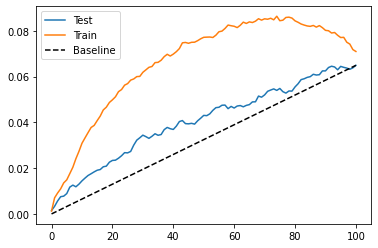

In [7]:
gain_curve_test = cumulative_gain(test_pred, "cate", y="converted", t="em1")
gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[X])), "cate", y="converted", t="em1")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test, "converted", "em1")], linestyle="--", color="black", label="Baseline")
plt.legend();

Como podemos ver, este estimador plug-and-play é melhor do que aleatório no conjunto de teste. Ainda assim, parece que está sofrendo bastante overfitting, pois o desempenho no conjunto de treinamento é muito melhor do que no conjunto de teste.

Isso é realmente uma das maiores desvantagens dessa técnica de transformação do alvo. Com essa transformação do alvo, você obtém muita simplicidade, pois pode simplesmente transformar o alvo e usar qualquer estimador de aprendizado de máquina para prever efeitos heterogêneos do tratamento. O custo disso é que você obtém muita variância. Isso ocorre porque o alvo transformado é uma estimativa muito ruidosa do efeito individual do tratamento, e essa variância é transferida para sua estimativa. Isso é um grande problema se você não tiver muitos dados, mas deve ser menos problemático em aplicações de big data, onde lidamos com mais de 1 milhão de amostras.

## O Caso de Tratamento Contínuo

![img](./data/img/plug-and-play-estimators/second-estimator.png)

Outra desvantagem evidente do método de transformação do alvo é que ele só funciona para tratamentos discretos ou binários. Isso é algo que você vê muito na literatura de inferência causal. A maior parte da pesquisa é feita para o caso de tratamento binário, mas você não encontra muito sobre tratamentos contínuos. Isso me incomodou bastante, porque na indústria, tratamentos contínuos estão em toda parte, principalmente na forma de preços que você precisa otimizar. Então, mesmo que eu não tenha encontrado nada sobre transformações de alvo para tratamento contínuo, eu inventei algo que funciona na prática. Apenas tenha em mente que não tenho uma pesquisa econométrica super sólida sobre isso.
 
Para motivar isso, voltemos ao exemplo de vendas de sorvete. Lá, tínhamos a tarefa de estimar a elasticidade da demanda em relação ao preço para que possamos ajustar melhor os preços do sorvete e otimizar nossas receitas. Lembre-se de que a amostra de eventos no conjunto de dados é um dia e desejamos saber quando as pessoas são menos sensíveis a aumentos de preço. Além disso, lembre-se de que os preços são atribuídos aleatoriamente neste conjunto de dados, o que significa que não precisamos nos preocupar com viés de confusão.

In [8]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
prices_rnd.head()

,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


Como antes, vamos começar separando nossos dados em conjuntos de treinamento e teste.

In [9]:
np.random.seed(123)
train, test = train_test_split(prices_rnd, test_size=0.3)
train.shape, test.shape

((3500, 5), (1500, 5))

Agora é onde precisamos de um pouco de criatividade. Para o caso discreto, o efeito médio condicional do tratamento é dado por quanto o resultado muda quando passamos de não tratado para tratado, condicionado às características da unidade $X$.
 
$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$
 
Em termos simples, isso significa estimar o impacto do tratamento em diferentes perfis de unidade, onde os perfis são definidos usando as características $X$. Para o caso contínuo, não temos aquela chave liga-desliga. As unidades não são tratadas ou não tratadas. Pelo contrário, todas são tratadas, mas com intensidades diferentes. Portanto, não podemos falar sobre o efeito de dar o tratamento. Em vez disso, precisamos falar em termos de aumentar o tratamento. Em outras palavras, desejamos saber como o resultado mudaria se aumentássemos o tratamento em alguma quantidade. Isso é como estimar a derivada parcial da função de resultado $Y$ em relação ao tratamento $t$. E porque desejamos saber isso para cada grupo (o CATE, não o ATE), condicionamos às características $X$.
 
$
\tau(x) = E[\partial Y_i(t)|X] = E[\tau_i|X]
$
 
Como podemos estimar isso? Primeiro, vamos considerar o caso fácil, onde o resultado é linear em relação ao tratamento. Suponha que você tenha dois tipos de dias: dias quentes (amarelos) e dias frios (azuis). Em dias frios, as pessoas são mais sensíveis a aumentos de preço. Além disso, à medida que o preço aumenta, a demanda cai linearmente.
 
![img](./data/img/plug-and-play-estimators/linear-case.png)
 
Nesse caso, o CATE será a inclinação de cada linha de demanda. Essas inclinações nos dirão quanto a demanda diminuirá se aumentarmos o preço em qualquer quantidade. Se essa relação for realmente linear, podemos estimar essas elasticidades com o coeficiente de uma estimativa de regressão linear simples em dias quentes e em dias frios separadamente.
 
$$
\hat{\tau(x)} = Cov(Y_i, T_i)/Var(T_i) = \dfrac{\sum(Y_i- \bar{Y})(T_i - \bar{T})}{\sum (T_i - \bar{T})^2}
$$
 
Podemos nos inspirar nesse estimador e pensar como seria para uma unidade individual. Em outras palavras, e se tivermos a mesma coisa lá em cima, definida para cada dia. Na minha cabeça, seria algo assim:

$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
Em termos simples, nós transformaríamos o alvo original subtraindo a média dele, depois multiplicaríamos pelo tratamento, do qual também subtrairíamos a média. Por fim, dividiríamos pelo desvio padrão do tratamento. Assim, teríamos uma transformação do alvo para o caso contínuo.

![img](./data/img/plug-and-play-estimators/genious.jpeg)

A questão agora é: isso funciona? De fato, funciona, e podemos passar por uma prova semelhante para entender por que funciona, assim como fizemos no caso binário. Primeiro, vamos chamar
 
$
V_i = \dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
Observe que $E[V_i|X_i=x]=0$ porque sob a atribuição aleatória $E[T_i|X_i=x]=\bar{T}$. Em outras palavras, para cada região de X, $E[T_i]=\bar{T}$. Além disso, $E[T_i V_i | X_i=x]=1$ porque $E[T_i(T_i - \bar{T})|X_i=x] = E[(T_i - \bar{T})^2|X_i=x]$, que é a variância do tratamento. Finalmente, sob independência condicional (que obtemos gratuitamente no caso de atribuição de tratamento aleatório), $E[T_i e_i | X_i=x] = E[T_i | X_i=x] E[e_i | X_i=x]$.
 
Para mostrar que essa transformação do alvo funciona, precisamos lembrar que estamos estimando o parâmetro para um modelo linear local.
 
$
Y_i = \alpha + \beta T_i + e_i | X_i=x
$
 
Em nosso exemplo, esses seriam os modelos lineares para os dias quentes e frios. Aqui, estamos interessados no parâmetro $\beta$, que é nossa elasticidade condicional ou CATE. Com tudo isso, podemos provar que
 
$
\begin{align}
E[Y^*_i|X_i=X] &= E[(Y_i-\bar{Y})V_i | X_i=x] \\
&= E[(\alpha + \beta T_i + e_i - \bar{Y})V_i | X_i=x] \\
&= \alpha E[V_i | X_i=x] + \beta E[T_i V_i | X_i=x] + E[e_i V_i | X_i=x] \\
&= \beta + E[e_i V_i | X_i=x] \\
&= \beta = \tau(x)
\end{align}
$
 
Tenha em mente que isso só funciona quando o tratamento é randomizado. Para tratamento não randomizado, precisamos substituir $\bar{T}$ por $M(X_i)$, onde $M$ é um modelo que estima $E[T_i|X_i=x]$.
 
$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - M(T_i))}{(T_i - M(T_i))^2}
$
 
Isso garantirá que o termo $\alpha E[V_i | X_i=x]$ na terceira linha se anule para zero e que o termo $E[T_i V_i | X_i=x]$ vá para 1. Observe que você realmente não precisa que $E[T_i V_i | X_i=x]$ vá para 1 se você apenas quiser ordenar unidades em termos de efeito do tratamento. Em outras palavras, se você só quiser saber em quais dias a demanda é mais sensível a aumentos de preço, mas não precisa saber em quanto, não importa se as estimativas de $\beta$ são escaladas para cima ou para baixo. Se esse for o caso, você pode omitir o denominador.
 
$
Y^*_i = (Y_i- \bar{Y})(T_i - M(T_i))
$
 
Se toda essa matemática parecer cansativa, não se preocupe. O código é realmente muito simples. Mais uma vez, transformamos nosso alvo de treinamento com as fórmulas vistas acima. Aqui, temos atribuições de tratamento aleatórias, então não precisamos construir um modelo que prevê preços. Também estou omitindo o denominador, porque aqui só me importa ordenar o efeito do tratamento.

In [10]:
y_star_cont = (train["price"] - train["price"].mean()
               *train["sales"] - train["sales"].mean())

Em seguida, assim como antes, ajustamos um modelo de aprendizado de máquina de regressão para prever esse alvo.

In [11]:
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)

np.random.seed(123)
cate_learner.fit(train[["temp", "weekday", "cost"]], y_star_cont)

cate_test_transf_y = cate_learner.predict(test[["temp", "weekday", "cost"]])

test_pred = test.assign(cate=cate_test_transf_y)
test_pred.sample(5)

,temp,weekday,cost,price,sales,cate
2815,15.7,4,1.5,3,187,-1395.956278
257,29.4,3,1.0,3,209,-1607.400415
2585,24.6,6,1.0,10,197,-1497.197402
3260,20.2,1,0.5,4,246,-1629.798111
1999,10.0,4,0.5,10,139,-1333.690544


Desta vez, a interpretação do CATE não é intuitiva. Como removemos o denominador da transformação do alvo, este CATE que estamos vendo é escalado por $Var(X)$. No entanto, essa previsão ainda deve ordenar bastante bem o efeito do tratamento. Para ver isso, podemos usar a curva de ganho acumulado, assim como fizemos antes.

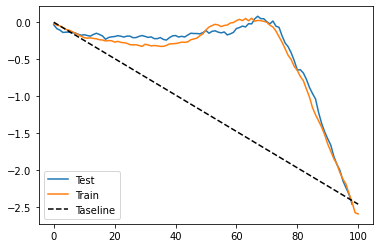

In [12]:
gain_curve_test = cumulative_gain(test.assign(cate=cate_test_transf_y),
                                "cate", y="sales", t="price")

gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[["temp", "weekday", "cost"]])),
                                   "cate", y="sales", t="price")


plt.plot(gain_curve_test, label="Test")
plt.plot(gain_curve_train, label="Train")
plt.plot([0, 100], [0, elast(test, "sales", "price")], linestyle="--", color="black", label="Taseline")
plt.legend();

Para esses dados, parece que o modelo com o alvo transformado é muito melhor do que aleatório. Além disso, os resultados de treinamento e teste estão bastante próximos, então a variância não é um problema aqui. Mas isso é apenas uma característica deste conjunto de dados. Se você se lembra, esse não foi o caso quando exploramos o caso de tratamento binário. Lá, o modelo não teve um desempenho tão bom.

### Efeitos de Tratamento Não Lineares
 
Depois de falar sobre o caso contínuo, ainda há um elefante na sala que precisamos abordar. Assumimos linearidade no efeito do tratamento. No entanto, isso raramente é uma suposição razoável. Normalmente, os efeitos do tratamento saturam de uma forma ou de outra. Em nosso exemplo, é razoável pensar que a demanda diminuirá mais rapidamente nos primeiros aumentos de preço, mas depois cairá mais lentamente.
 
![img](./data/img/plug-and-play-estimators/non-linear-case.png)
 
O problema aqui é que **a elasticidade ou efeito do tratamento muda com o próprio tratamento**. Em nosso exemplo, o efeito do tratamento é mais intenso no início da curva e menor à medida que os preços aumentam. Novamente, suponha que você tenha dois tipos de dias: dias quentes (amarelos) e dias frios (azuis) e queremos distinguir entre os dois com um modelo causal. A questão é que modelos causais devem prever a elasticidade, mas, no caso não linear, a elasticidade para dias quentes e frios poderia ser a mesma, se olharmos para diferentes pontos de preço na curva (imagem à direita).
 
Não há uma solução fácil para esse problema, e confesso que ainda estou investigando o que funciona melhor. Por enquanto, o que faço é tentar pensar na forma funcional do efeito do tratamento e de alguma forma linearizá-lo. Por exemplo, a demanda geralmente tem a seguinte forma funcional, onde valores mais altos de $\alpha$ significam que a demanda diminui mais rapidamente com cada aumento de preço:
 
$
D_i = \dfrac{1}{P_i^{\alpha}}
$

Então, se eu aplicar a transformação logarítmica tanto na demanda $Y$ quanto nos preços $T$, eu devo obter algo que seja linear.

$
\begin{align}
log(D)_i &= log\bigg(\dfrac{1}{P_i^{\alpha}}\bigg) \\
&= log(1) - log(P_i^{\alpha}) \\
&= log(1) - log(P_i^{\alpha}) \\
&= - \alpha * log(P_i) \\
\end{align}
$
 
A linearização não é tão fácil de fazer, pois envolve um pouco de reflexão. Mas você também pode experimentar e ver o que funciona melhor. Muitas vezes, coisas como logaritmos e raízes quadradas ajudam.
 
## Conceitos-chave

Agora estamos indo na direção de estimar efeitos médios condicionais de tratamento usando modelos de aprendizado de máquina. O maior desafio ao fazer isso é adaptar um modelo preditivo para um que estima efeitos causais. Outra maneira de pensar nisso é que modelos preditivos se concentram em estimar o resultado Y como uma função das características X e possivelmente do tratamento T $Y = M(X, T) $, enquanto modelos causais precisam estimar a derivada parcial dessa função de saída em relação ao tratamento $ \partial Y = \partial M(X, T) $. Isso está longe de ser trivial, porque, embora observemos o resultado Y, não podemos observar $\partial Y$, pelo menos não em um nível individual. Como consequência, precisamos ser criativos ao projetar uma função objetivo para nossos modelos.
 
Aqui, vimos uma técnica muito simples de transformação do alvo. A ideia é combinar o alvo original Y com o tratamento T para formar um alvo transformado que, em expectativa, seja igual ao CATE. Com esse novo alvo, podemos usar qualquer modelo preditivo de aprendizado de máquina para estimá-lo e, em seguida, as previsões do modelo serão estimativas do CATE. Como nota adicional, além da transformação do alvo, esse método também é conhecido como **F-Learner**.
 
Com toda essa simplicidade, também há um preço a pagar. O alvo transformado é uma estimativa muito ruidosa do efeito do tratamento individual e esse ruído será transferido para as estimativas do modelo na forma de variância. Isso torna a transformação do alvo mais adequada para aplicações de big data, onde a variância é menos problemática devido ao grande tamanho da amostra. Outra desvantagem do método de transformação do alvo é que ele só é definido para tratamentos binários ou categóricos. Fizemos o nosso melhor para criar uma versão contínua da abordagem e até acabamos com algo que parecia funcionar, mas até agora, não há um framework teórico sólido para respaldá-lo.
 
Finalmente, terminamos com uma discussão sobre efeitos de tratamento não lineares e os desafios que surgem com isso. Ou seja, quando o efeito do tratamento muda com o próprio tratamento, podemos erroneamente pensar que as unidades têm a mesma curva de resposta ao tratamento porque têm a mesma responsividade ao tratamento, mas na verdade estão apenas recebendo quantidades diferentes de tratamento.

## Referências

As coisas que escrevi aqui são em sua maioria ideias que surgiram em minha mente. Aprendi essas coisas por meio da experiência. Isso significa que não há uma referência direta que eu possa indicar. Também significa que as coisas que escrevi aqui **não** passaram pela escrutínio acadêmico que a boa ciência frequentemente enfrenta. Em vez disso, observe como estou falando sobre coisas que funcionam na prática, mas não dedico muito tempo a explicar por que isso é assim. É uma espécie de ciência das ruas, por assim dizer. No entanto, estou submetendo isso à escrutínio público, então, de alguma forma, se encontrar algo absurdo, abra uma issue, e eu o abordarei da melhor forma possível. 
 
A maior parte deste capítulo é baseada no artigo de Susan Athey e Guido W. Imbens, *Machine Learning Methods for Estimating Heterogeneous Causal Effects*. Algum material sobre transformação de alvo também pode ser encontrado no artigo de Pierre Gutierrez e Jean-Yves G´erardy, *Causal Inference and Uplift Modeling: A review of the literature*. Observe que esses artigos abordam apenas o caso de tratamento binário. Outra revisão de modelos causais para a estimativa do CATE que faz referência ao F-Learner é *Meta-learners for Estimating Heterogeneous Treatment Effects using Machine Learning*, de K¨unzel et al, 2019.

 
## Contribua

"Inferência Causal para os Corajosos e Verdadeiros" é um material de código aberto sobre inferência causal, a estatística da ciência. Seu objetivo é ser acessível monetariamente e intelectualmente. Ele utiliza apenas software gratuito baseado em Python.
Se você encontrou valor neste livro e deseja apoiá-lo, por favor, vá para o [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Se você não estiver pronto para contribuir financeiramente, também pode ajudar corrigindo erros, sugerindo edições ou dando feedback sobre trechos que não compreendeu. Acesse o repositório do livro e abra uma issue na [versão em inglês](https://github.com/matheusfacure/python-causality-handbook/issues) ou na [versão em português](https://github.com/rdemarqui/python-causality-handbook-ptbr/issues). Por fim, se você gostou deste conteúdo, compartilhe com outras pessoas que possam achar útil e dê uma estrela no GitHub na [versão em inglês](https://github.com/matheusfacure/python-causality-handbook/stargazers) e na [versão em português](https://github.com/rdemarqui/python-causality-handbook-ptbr/stargazers).

---

<div align="center">
<a href="19-Evaluating-Causal-Models.ipynb"><-- Anterior</a>  
<a href="00-Summary.ipynb">| Sumário |</a>  
<a href="21-Meta-Learners.ipynb">Próximo --></a>  
</div>